In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

#sklearn.preprocessing 내 다양한 re-scaling 방법
#scale(X): 기본 스케일. 평균과 표준편차 사용
#robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
#minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
#maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [2]:
# set seed for reproducibility
##seed값은 난수 생성에 사용되며 한번만 설정해주면 됨
np.random.seed(0)

In [3]:
#re-scaling 방법에 따라 값이 어떻게 변환되는지 간단히 살펴보기
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
## 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 배열을 만든다.
df1 = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])

##아웃라이어가 심하면 robust_scale
##MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환
##MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환

In [4]:
df1

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


Min-Max Scaling

In [5]:
#서로 다른 분포의 랜덤 데이터 생성
df2 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    ## 자유도가 8이고, size가 1000인 카이제곱 분포
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    ## 알파가 8, 베타가 2, size가 1000인 베타분포
    # no skew
    'x3': np.random.normal(50, 3, 1000)
    ## 평균이 50이고 표준편차가 3, size가 1000인 정규분포
})

In [6]:
#정규화
scaler = preprocessing.MinMaxScaler()
scaled_df2 = scaler.fit_transform(df2)
##fit 메서드를 실행하면 분포 모수를 객체내에 저장, transform 메서드를 실행하면 학습용 데이터를 변환
scaled_df2 = pd.DataFrame(scaled_df2, columns=['x1', 'x2', 'x3'])

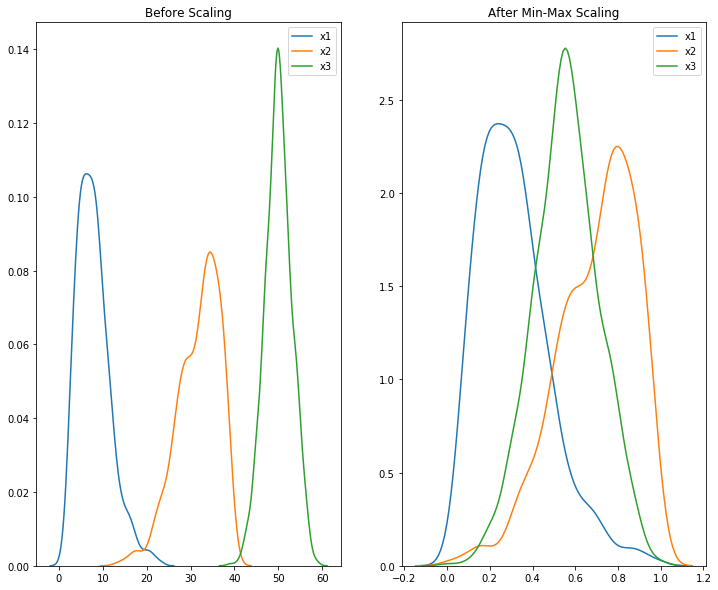

In [7]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10)) ##scale전의 그래프
ax1.set_title('Before Scaling')
sns.kdeplot(df2['x1'], ax=ax1)
sns.kdeplot(df2['x2'], ax=ax1)
sns.kdeplot(df2['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling') ##scale 후의 그래프
sns.kdeplot(scaled_df2['x1'], ax=ax2)
sns.kdeplot(scaled_df2['x2'], ax=ax2)
sns.kdeplot(scaled_df2['x3'], ax=ax2)
plt.show()

Standardizing

In [8]:
#서로 다른 정규분포를 따르는 랜덤 데이터 생성
df3 = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

## 사이즈는 10000으로 같지만, 평균과 표준편차는 다름

In [9]:
#정규화
scaler = preprocessing.StandardScaler() ##StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환
scaled_df3 = scaler.fit_transform(df3)
scaled_df3 = pd.DataFrame(scaled_df3, columns=['x1', 'x2', 'x3'])

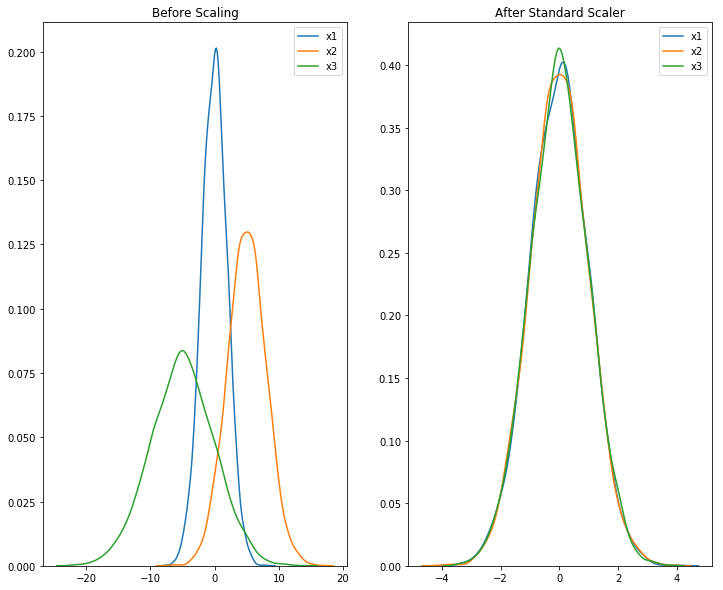

In [10]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df3['x1'], ax=ax1)
sns.kdeplot(df3['x2'], ax=ax1)
sns.kdeplot(df3['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df3['x1'], ax=ax2)
sns.kdeplot(scaled_df3['x2'], ax=ax2)
sns.kdeplot(scaled_df3['x3'], ax=ax2)
plt.show()
##평균과 분산을 같게 해서 일치하게 함